In [1]:
import numpy as np
import openpyxl as xl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
import networkx as nx
fname = 'db_mli_pc_231209_v2.gz'
G = nx.read_gpickle(fname)

In [3]:
for nid in G.nodes:
    print(f'{nid}: {G.nodes(data=True)[nid]}')

cc_0: {'cell_type': 'cc', 'xyz': (716736, 1384080, 6480), 'tags': ['cc'], 'finished': False}
gcl_0: {'cell_type': 'interneuron', 'xyz': (1082368, 1712000, 8840), 'tags': [], 'finished': False}
gcl_1: {'cell_type': 'interneuron', 'xyz': (1039408, 1712352, 35080), 'tags': [], 'finished': False}
gcl_10: {'cell_type': 'interneuron', 'xyz': (1768800, 1661712, 44440), 'tags': [], 'finished': False}
gcl_11: {'cell_type': 'interneuron', 'xyz': (2002144, 1763760, 9800), 'tags': [], 'finished': False}
gcl_12: {'cell_type': 'interneuron', 'xyz': (1997584, 1711344, 37880), 'tags': [], 'finished': False}
gcl_13: {'cell_type': 'interneuron', 'xyz': (1919744, 1663472, 46760), 'tags': ['golgi'], 'finished': True}
gcl_14: {'cell_type': 'interneuron', 'xyz': (2083760, 1731152, 21240), 'tags': ['golgi'], 'finished': False}
gcl_15: {'cell_type': 'interneuron', 'xyz': (2265920, 1630128, 43080), 'tags': [], 'finished': False}
gcl_16: {'cell_type': 'interneuron', 'xyz': (2227888, 1753376, 37160), 'tags': ['g

In [14]:
list(G.out_edges('interneuron_225', data=True))

[('interneuron_225',
  'interneuron_120',
  {'xyz': (98436.0, 91824.0, 707.0), 'area': 0.056475051829088956}),
 ('interneuron_225',
  'interneuron_120',
  {'xyz': (107976.0, 86132.0, 777.0), 'area': 0.10531997273222855}),
 ('interneuron_225',
  'interneuron_120',
  {'xyz': (109104.0, 88448.0, 812.0), 'area': 0.04283394169024086}),
 ('interneuron_225',
  'interneuron_122',
  {'xyz': (102600.0, 88276.0, 623.0), 'area': 0.011727531525505167}),
 ('interneuron_225',
  'interneuron_122',
  {'xyz': (118940.0, 82136.0, 770.0), 'area': 0.044839150607280207}),
 ('interneuron_225',
  'interneuron_174',
  {'xyz': (103888.0, 96756.0, 782.0), 'area': 0.0012534365440336286}),
 ('interneuron_225',
  'interneuron_174',
  {'xyz': (103972.0, 96252.0, 840.0), 'area': 0.11550243849819779}),
 ('interneuron_225',
  'interneuron_174',
  {'xyz': (96184.0, 86652.0, 849.0), 'area': 0.07278108706342049}),
 ('interneuron_225',
  'interneuron_174',
  {'xyz': (103468.0, 86120.0, 852.0), 'area': 0.07302767453183046})

In [61]:
# print(G.adj['interneuron_81'].keys())

In [62]:
# # Prints connections of neuron (no duplicates)
# nid = 'interneuron_299'
# print(f'postsyn of {nid}: {list(G.successors(nid))}')

In [5]:
# Updating cell type database 


data = pd.read_csv(r'C:\Users\regehr2\HarvardMedProjects\CellTypeDB.csv')
#filtered_data = data[data['Neuron_ID'].isin(neurons)] 

CellType_dict = dict(zip(data['Neuron_ID'], data['Cell Type']))

# Function to lowercase keys if they contain "interneuron"
def lowercase_keys_containing_interneuron(dictionary):
    updated_dict = {}
    for key, value in dictionary.items():
        if 'nterneuron' in key.lower():
            updated_dict[key.lower()] = value
        else:
            updated_dict[key] = value
    return updated_dict

# Apply the function to the dictionary
CellType_dict = lowercase_keys_containing_interneuron(CellType_dict)

In [6]:
# Prints the connections between one neuron and one possible connections
def connections(name_neuron, possible_connection):
    list(G.out_edges(name_neuron, data=True))
    connects = list(G.out_edges(name_neuron, data=True))

    counter = 0
    for connection in connects:
            if (connection[1] == possible_connection):
                counter += 1
                print(connection)
            
                
    if (counter == 0):
        print('No connections found between', name_neuron, 'and', 
        possible_connection)
    counter = 0

# Prints the number of connections between a neuron
# (name_neuron) and a target neuron (possible_connections)
def numConnections(name_neuron, possible_connection):
    list(G.out_edges(name_neuron, data=True))
    connects = list(G.out_edges(name_neuron, data=True))
    numConnections = []
    counter = 0
    for connection in connects:
            if (connection[1] == possible_connection):
                counter += 1        
                
    print("Number of connections from", name_neuron, "to", possible_connection, ":", counter)
            
        
        
        
# Prints all connections between each neuron in a list of
# neurons and a certain other neuron (connect). Also prints # of connections are between the two    
def check_all_connects(neurons, connect):

    for neuron in neurons:
        connections(neuron, connect)
        print("")
        
    for neuron in neurons:
        numConnections(neuron, connect)


In [60]:
# Check all connections in db to one. You can filter what celltype it is 
def all_connections_to(neuron, filter_list=False, sub=''):
    connects =list(G.in_edges(neuron, data=True))
    if filter_list:
        
#         for connection in connects:
#             conne
        connects = [connection for connection in connects if sub.lower().replace(" ", "")
                    in CellType_dict.get(connection[0], '').lower().replace(" ", "")]
    print('Number of connections:', len(connects))
    for connection in connects:
         print(connection)
        
   
            
                
    

In [70]:
all_connections_to('pc_16', True, 'mli')

Number of connections: 569
('interneuron_105', 'pc_16', {'xyz': (98616.0, 55340.0, 513.0), 'area': 0.011253416801753268})
('interneuron_105', 'pc_16', {'xyz': (100172.0, 48056.0, 537.0), 'area': 0.20579689918443572})
('interneuron_105', 'pc_16', {'xyz': (102908.0, 54068.0, 610.0), 'area': 0.287386680319152})
('interneuron_105', 'pc_16', {'xyz': (103008.0, 54216.0, 617.0), 'area': 0.09570783514637368})
('interneuron_105', 'pc_16', {'xyz': (104204.0, 68444.0, 741.0), 'area': 0.01076249504578645})
('interneuron_105', 'pc_16', {'xyz': (104164.0, 68532.0, 744.0), 'area': 0.05513460434217772})
('interneuron_112', 'pc_16', {'xyz': (96896.0, 48944.0, 458.0), 'area': 0.18167239619139972})
('interneuron_112', 'pc_16', {'xyz': (97024.0, 49100.0, 467.0), 'area': 0.26376838391331325})
('interneuron_112', 'pc_16', {'xyz': (96904.0, 48832.0, 488.0), 'area': 0.023934447943109734})
('interneuron_112', 'pc_16', {'xyz': (96980.0, 49040.0, 490.0), 'area': 0.13335161889797903})
('interneuron_112', 'pc_16',

In [67]:
neurons = ['interneuron_191',
'interneuron_188',
'interneuron_99',
'interneuron_173',
'interneuron_179',
'interneuron_178',
'interneuron_134',
'interneuron_185',
'interneuron_131',
'interneuron_95',
'interneuron_116',
'interneuron_177',
'interneuron_126'
]

In [68]:
check_all_connects(neurons, 'pc_16')

No connections found between interneuron_191 and pc_16

('interneuron_188', 'pc_16', {'xyz': (122416.0, 71112.0, 640.0), 'area': 0.08316011177838174})
('interneuron_188', 'pc_16', {'xyz': (123784.0, 73116.0, 687.0), 'area': 0.04578628617152932})
('interneuron_188', 'pc_16', {'xyz': (125396.0, 73804.0, 717.0), 'area': 0.022132961187106472})
('interneuron_188', 'pc_16', {'xyz': (126680.0, 69432.0, 768.0), 'area': 0.08940013561812132})
('interneuron_188', 'pc_16', {'xyz': (121364.0, 93436.0, 768.0), 'area': 0.11790202648769699})
('interneuron_188', 'pc_16', {'xyz': (105516.0, 70948.0, 822.0), 'area': 0.063169404177281})
('interneuron_188', 'pc_16', {'xyz': (105560.0, 71048.0, 823.0), 'area': 0.035347752267545975})
('interneuron_188', 'pc_16', {'xyz': (107960.0, 68192.0, 834.0), 'area': 0.07601197904291823})
('interneuron_188', 'pc_16', {'xyz': (105632.0, 70904.0, 834.0), 'area': 0.07595803254147722})
('interneuron_188', 'pc_16', {'xyz': (105712.0, 70964.0, 837.0), 'area': 0.07130146062847

In [69]:
def bool_check_connects(name_neuron, possible_connection):
    ret = False
    list(G.out_edges(name_neuron, data=True))
    connects = list(G.out_edges(name_neuron, data=True))
    numConnections = []
    counter = 0
    for connection in connects:
            if (connection[1] == possible_connection):
                counter += 1                      
    if (counter > 0):
        ret = True
    return ret

# print(bool_check_connects('interneuron_188', 'pc_16'))

In [70]:
def list_or_string_no_connection(name, sheet, possible_connection, row):
    if isinstance(name, str):
    # If name_neuron is a single string
        if not bool_check_connects(name, possible_connection):
            sheet.cell(row=row, column=1, value=name)
            sheet.cell(row=row, column=2, value=possible_connection)
            sheet.cell(row=row, column=3, value='No Connection')
            sheet.cell(row=row, column=4, value='No Connection')
            row += 1
            return row
    else:
        # If name_neuron is a list of strings
        for n in name:
            if not bool_check_connects(n, possible_connection):
                sheet.cell(row=row, column=1, value=n)
                sheet.cell(row=row, column=2, value=possible_connection)
                sheet.cell(row=row, column=3, value='No Connection')
                sheet.cell(row=row, column=4, value='No Connection')
                sheet.cell(row=row, column=5, value=CellType_dict.get(n))
                row += 1
    return row
    

In [71]:
# Opens an excel file and writes all the wanted data from connections
def automate_connections_id(name_neuron, possible_connection, xl_file_path):
    
    # Activates spreadsheet and deletes anything that was already there.
    # Sets row, col, gets list of all connections
    
    # excel_file_path = r'C:\Users\regehr2\Downloads\test-book.xlsx'
    workbook = xl.load_workbook(xl_file_path)
    row_number, col_number = 1, 1
    list(G.out_edges(name_neuron, data=True))
    connects = list(G.out_edges(name_neuron, data=True))
    sheet = workbook.active
    sheet.delete_cols(1, sheet.max_row)
    sheet.delete_cols(2, sheet.max_row)
    sheet.delete_cols(3, sheet.max_row)
    sheet.delete_cols(4, sheet.max_row)
    
    # Goes through all neurons with no connection to possible_connection and writes no connection in 
    # spreadsheet
    row_number = list_or_string_no_connection(name_neuron, sheet, possible_connection, row_number)
    
    # Goes through list of connections of input(s) and filters out non wanted connections then
    # writes it to sheet
    for connection in connects: 
        if (connection[1] == possible_connection):
                sheet.cell(row=row_number, column=col_number, value=connection[0])
                sheet.cell(row=row_number, column=col_number + 1, value=connection[1])
                sheet.cell(row=row_number, column=col_number, value=connection[0])
                sheet.cell(row=row_number, column=col_number + 1, value=connection[1])
                it = iter(connection[2].values())
                coord_str, area = str(next(iter(it))), next(iter(it))
                coord = coord_str.strip('(').strip(')')
                sheet.cell(row=row_number, column=col_number + 2, value=coord)
                sheet.cell(row=row_number, column=col_number + 3, value=area)
                c_type = CellType_dict.get(connection[0])
               
                sheet.cell(row=row_number, column=col_number + 4, value=c_type)
                
                

                row_number += 1

    workbook.save(xl_file_path)


In [72]:
print(CellType_dict.get('interneuron_298'))

MLI1


In [73]:
# Goes through a list of neurons and writes all data from connections to each of those possible connections
# to a given xl sheet path
def automated_connections_list(loNeurons, wanted_connection, xl_path):
#     for neuron in loNeurons:
        automate_connections_id(loNeurons, wanted_connection, xl_path)
        

In [74]:
# Testing if automate_connections_id works
automate_connections_id('interneuron_191', 'pc_16', r'C:\Users\regehr2\Downloads\test-book.xlsx')

In [75]:
# Testing if automated_connections_list
automated_connections_list(neurons,'pc_16', r'C:\Users\regehr2\Downloads\test-book.xlsx')

#  Visualizing pc_16 connections

In [76]:
# importing data from csv File
data = pd.read_csv(r'C:\Users\regehr2\HarvardMedProjects\CellTypeDB.csv')
#filtered_data = data[data['Neuron_ID'].isin(neurons)] 

CellType_dict = dict(zip(data['Neuron_ID'], data['Cell Type']))


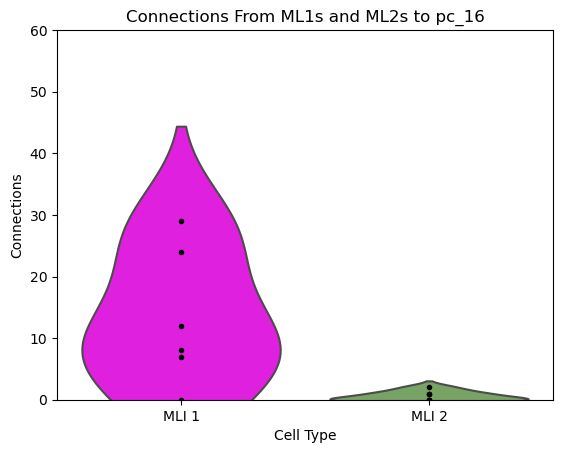

In [102]:
# Returns type of cell and number of times it connects with possible_connection
def put_num_connections_df_helper(name_neuron, possible_connection):
    list(G.out_edges(name_neuron, data=True))
    connects = list(G.out_edges(name_neuron, data=True))
    counter = 0
    type_num = []
    for connection in connects:
            if (connection[1] == possible_connection):
                counter += 1   
    type_num = [CellType_dict.get(name_neuron), counter]
    return type_num

put_num_connections_df_helper('interneuron_177', 'pc_16')


def put_num_connections_df_violin(neurons, possible_connection, col1, col2):
    columns = [col1, col2]
    whole_list = []
    single_list = []
    index = [0] * len(neurons)
    
    # puts all individual connection counts into a larger list
    for i, neuron in enumerate(neurons):
        single_list = put_num_connections_df_helper(neuron, possible_connection)
        index[i] = i
        whole_list.append(single_list)
    
    #puts whole_list into a pandas df
    df = pd.DataFrame(whole_list, columns=columns, index=index)# #     df = pd.DataFrame(whole_dict)
    
    df.loc[df['Cell Type'] == 'MLI1', 'Cell Type'] = 'MLI 1'
    df.loc[df['Cell Type'] == 'MLI2', 'Cell Type'] = 'MLI 2'
    # Apply the function to the specified column
    
    df = df.sort_values(by=['Cell Type'])
    
    # wanted colors for cell types
    colors = {'MLI 2' : '#73AF59', 'MLI 1' : '#FF00FF'}
    
    # Creating violin plot
    sns.violinplot(x=col1, y=col2, data=df,  inner=None, palette=colors, scale='width')
    sns.stripplot(x=col1, y=col2, data=df, color='black', size=4, jitter=False)
    plt.title('Connections From ML1s and ML2s to '+ possible_connection )
    plt.ylim(0, 60)
    
    plt.show()



put_num_connections_df_violin(neurons, 'pc_16', 'Cell Type', 'Connections')
    

# Interneuron Connections onto pc_35

In [78]:
neuron_connections_pc35 = ['interneuron_258',
'interneuron_298',
'interneuron_276',
'interneuron_299',
'interneuron_38',
'interneuron_269',
'interneuron_284',
'interneuron_43'
]

In [79]:
check_all_connects(neuron_connections_pc35, 'pc_35')

('interneuron_258', 'pc_35', {'xyz': (163024.0, 65140.0, 293.0), 'area': 0.13852107111100687})
('interneuron_258', 'pc_35', {'xyz': (165792.0, 64180.0, 319.0), 'area': 0.29841263494122955})
('interneuron_258', 'pc_35', {'xyz': (170860.0, 68596.0, 319.0), 'area': 0.03267677455866699})
('interneuron_258', 'pc_35', {'xyz': (162504.0, 65680.0, 320.0), 'area': 0.3370007462920606})
('interneuron_258', 'pc_35', {'xyz': (162272.0, 65764.0, 323.0), 'area': 0.07580625804654649})
('interneuron_258', 'pc_35', {'xyz': (167624.0, 63324.0, 326.0), 'area': 0.09333263681587199})
('interneuron_258', 'pc_35', {'xyz': (167016.0, 63760.0, 327.0), 'area': 0.003870900753887242})
('interneuron_258', 'pc_35', {'xyz': (167524.0, 63328.0, 330.0), 'area': 0.1057905205211287})
('interneuron_258', 'pc_35', {'xyz': (168120.0, 62432.0, 340.0), 'area': 0.009854915981302871})
('interneuron_258', 'pc_35', {'xyz': (171024.0, 68856.0, 420.0), 'area': 0.051413525765278356})
('interneuron_258', 'pc_35', {'xyz': (169992.0, 6

In [80]:
# Write data to spreadsheet to copy to main google sheets
automated_connections_list(neuron_connections_pc35,'pc_35', r'C:\Users\regehr2\Downloads\test-book.xlsx')

# Visualizing Connections onto PC_35

Make sure to update the dictionary/df

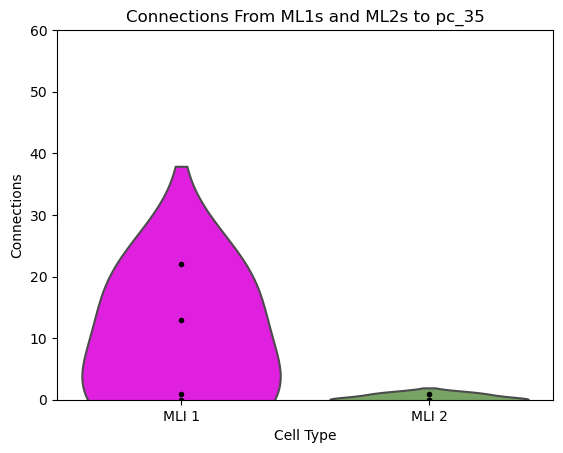

In [81]:
# Visualize contacts onto pc_35
put_num_connections_df_violin(neuron_connections_pc35, 'pc_35', 'Cell Type', 'Connections')

# Interneuron Connections onto pc_50

In [86]:
neuron_connections_pc50 = ['interneuron_253',
'interneuron_87',
'interneuron_140'
]

In [92]:
check_all_connects(neuron_connections_pc50, 'pc_50')

No connections found between interneuron_253 and pc_50

('interneuron_87', 'pc_50', {'xyz': (133292.0, 76464.0, 940.0), 'area': 0.07685083464311249})

No connections found between interneuron_140 and pc_50

Number of connections from interneuron_253 to pc_50 : 0
Number of connections from interneuron_87 to pc_50 : 1
Number of connections from interneuron_140 to pc_50 : 0


In [91]:
automated_connections_list(neuron_connections_pc50,'pc_50', r'C:\Users\regehr2\Downloads\test-book.xlsx')

# Visualizing connections onto pc_50

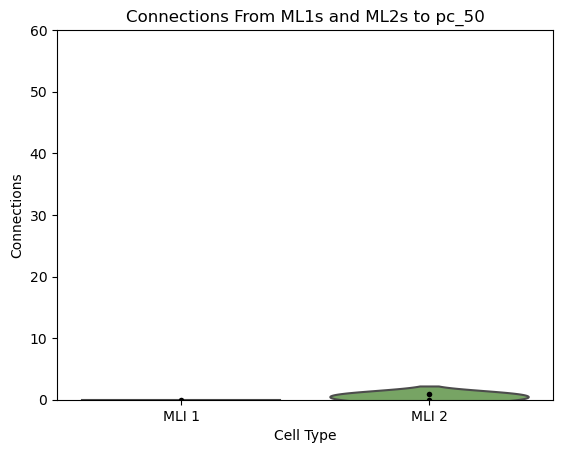

In [93]:
put_num_connections_df_violin(neuron_connections_pc50, 'pc_50', 'Cell Type', 'Connections')

# Interneuron Connections onto pc_10

In [95]:
neuron_connections_pc10 = ['interneuron_167',
'interneuron_160',
'interneuron_157',
'interneuron_169',
'interneuron_256'
]

In [97]:
check_all_connects(neuron_connections_pc10, 'pc_10')

('interneuron_167', 'pc_10', {'xyz': (158468.0, 81984.0, 274.0), 'area': 0.44018223296598646})
('interneuron_167', 'pc_10', {'xyz': (158508.0, 82088.0, 282.0), 'area': 0.06329380469497344})
('interneuron_167', 'pc_10', {'xyz': (158396.0, 82036.0, 295.0), 'area': 0.07145112014771715})
('interneuron_167', 'pc_10', {'xyz': (158036.0, 82504.0, 330.0), 'area': 0.06622054297930369})
('interneuron_167', 'pc_10', {'xyz': (158000.0, 82524.0, 335.0), 'area': 0.004657866789176038})
('interneuron_167', 'pc_10', {'xyz': (163252.0, 86320.0, 396.0), 'area': 0.2203101772542908})
('interneuron_167', 'pc_10', {'xyz': (163324.0, 86356.0, 410.0), 'area': 0.052010865005600794})
('interneuron_167', 'pc_10', {'xyz': (162696.0, 85540.0, 420.0), 'area': 0.06852971891743903})

No connections found between interneuron_160 and pc_10

No connections found between MLI1_0 and pc_10

('interneuron_157', 'pc_10', {'xyz': (142424.0, 73124.0, 86.0), 'area': 0.04729468595322048})
('interneuron_157', 'pc_10', {'xyz': (141

In [108]:
automated_connections_list(neuron_connections_pc10,'pc_10', r'C:\Users\regehr2\Downloads\test-book.xlsx')

# Visualizing Connections Onto pc_10

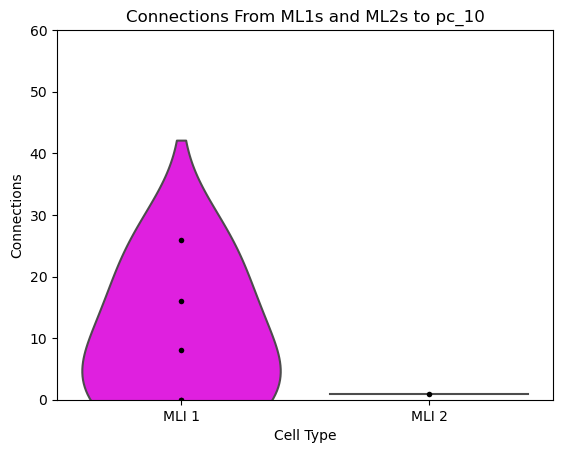

In [109]:
put_num_connections_df_violin(neuron_connections_pc10, 'pc_10', 'Cell Type', 'Connections')